In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv(r"C:\Users\Shraddha\srk_datasets\daily-min-temperatures.csv")

In [4]:
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
data.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [6]:
data.columns=['date','temp']
data.head()

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
data.isnull().sum()

date    0
temp    0
dtype: int64

In [8]:
data.set_index('date',inplace=True)

In [9]:
data.head()

,temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [10]:

data.describe()

,temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


<AxesSubplot:xlabel='date'>

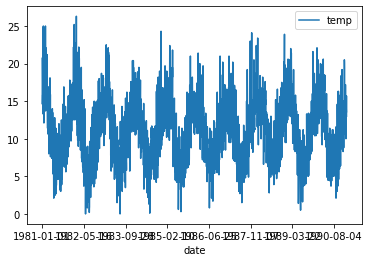

In [11]:
data.plot()

In [12]:

### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(data['temp'])

In [14]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:

adfuller_test(data['temp'])

ADF Test Statistic : -4.444804924611693
p-value : 0.000247082630036105
#Lags Used : 20
Number of Observations Used : 3629
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Auto Regressive Model

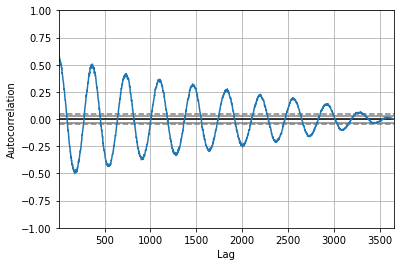

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['temp'])
plt.show()

In [31]:
conda install statsmodels

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

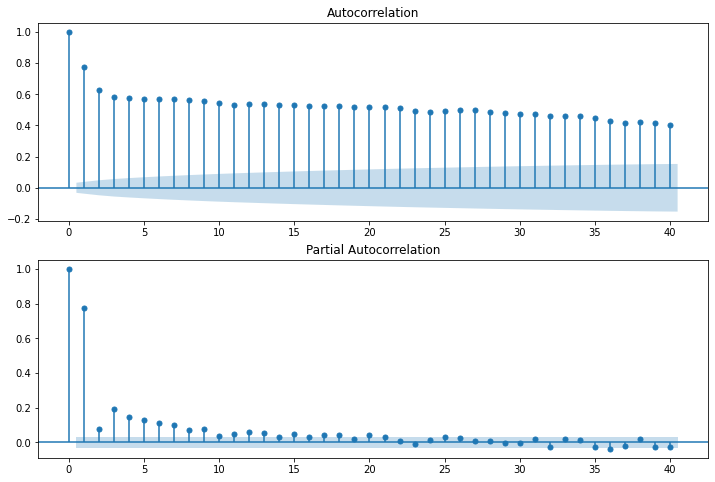

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['temp'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['temp'].iloc[13:],lags=40,ax=ax2)

In [35]:

# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [37]:
model=ARIMA(data['temp'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Shraddha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Shraddha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.temp   No. Observations:                 3649
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8413.563
Method:                       css-mle   S.D. of innovations              2.427
Date:                Sun, 04 Apr 2021   AIC                          16835.125
Time:                        15:10:42   BIC                          16859.934
Sample:                             1   HQIC                         16843.960
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0012      0.006     -0.201      0.841      -0.013       0.011
ar.L1.D.temp     0.4630      0.017     27.093      0.000       0.429       0.496
ma.L1.D.temp    -0.9204      0.006   -143.796      0.000      -0.933      -0.908
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1600           +0.0000j            2.1600            0.0000
MA.1            1.0865           +0.0000j            1.0865            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\Shraddha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:xlabel='date'>

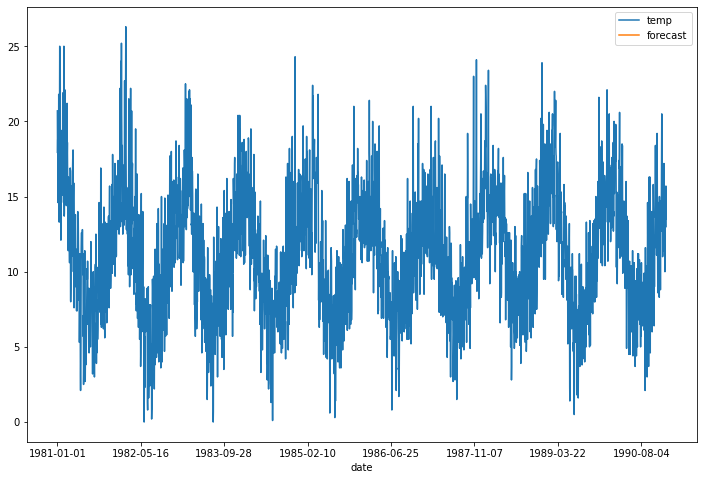

In [63]:
data['forecast']=model_fit.predict(start=3600,end=3650,dynamic=True)
data[['temp','forecast']].plot(figsize=(12,8))

In [46]:
import statsmodels.api as sm

In [48]:
model=sm.tsa.statespace.SARIMAX(data['temp'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Shraddha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<AxesSubplot:xlabel='date'>

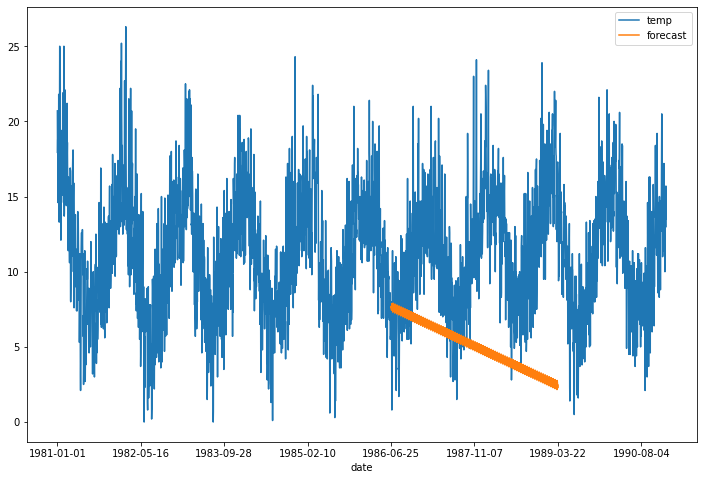

In [61]:
data['forecast']=results.predict(start=2000,end=3000,dynamic=True)
data[['temp','forecast']].plot(figsize=(12,8))